### **Подключение**

In [65]:
! pip install pyspark

In [66]:
from pyspark.sql import SparkSession

# Создаем SparkSession
spark = (
    SparkSession.builder
    .appName("My PySpark Application")   # Название приложения
    .master("local[*]")   # Указывает использовать локальный режим со всеми ядрами
    .config("spark.executor.memory", "2g")   # Настройка памяти для исполнителей
    .config("spark.driver.memory", "2g")   # Настройка памяти для драйвера
    .config("spark.sql.debug.maxToStringFields", 1000)
    .getOrCreate()
)

# Проверка успешного подключения
print("Spark Version:", spark.version)

Spark Version: 3.5.4


### **Данные**

### **Создаем DataFrame**

In [67]:
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType

# Данные первой таблицы
data1 = [
    (1360, 2, 1, 1981, 0.599, 0, 5, 262382.85),
    (4272, 3, 2, 2016, 4.753, 1, 6, 985260.85),
    (3592, 1, 1, 2016, 3.634, 0, 9, 777977.39),
    (966, 1, 1, 1977, 2.730, 1, 8, 229698.91),
    (4926, 2, 2, 1993, 4.699, 0, 8, 1041740.85)
]

# Схема первой таблицы
schema1 = StructType([
    StructField("Square_Footage", IntegerType(), True),
    StructField("Num_Bedrooms", IntegerType(), True),
    StructField("Num_Bathrooms", IntegerType(), True),
    StructField("Year_Built", IntegerType(), True),
    StructField("Lot_Size", DoubleType(), True),
    StructField("Garage_Size", IntegerType(), True),
    StructField("Neighborhood_Quality", IntegerType(), True),
    StructField("House_Price", DoubleType(), True)
])

# Создание первой таблицы
df1 = spark.createDataFrame(data1, schema=schema1)

# Данные второй таблицы
data2 = [
    (1, 0, 1, 0, 5),
    (2, 1, 1, 1, 6),
    (3, 0, 0, 1, 9),
    (4, 1, 0, 1, 8),
    (5, 0, 1, 0, 8)
]

# Схема второй таблицы
schema2 = StructType([
    StructField("Property_ID", IntegerType(), True),
    StructField("Garage_Size", IntegerType(), True),
    StructField("Has_Pool", IntegerType(), True),
    StructField("Has_Basement", IntegerType(), True),
    StructField("Neighborhood_Quality", IntegerType(), True)
])

# Создание второй таблицы
df2 = spark.createDataFrame(data2, schema=schema2)

# Показать данные
df1.show(3)
df2.show(3)

+--------------+------------+-------------+----------+--------+-----------+--------------------+-----------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|Lot_Size|Garage_Size|Neighborhood_Quality|House_Price|
+--------------+------------+-------------+----------+--------+-----------+--------------------+-----------+
|          1360|           2|            1|      1981|   0.599|          0|                   5|  262382.85|
|          4272|           3|            2|      2016|   4.753|          1|                   6|  985260.85|
|          3592|           1|            1|      2016|   3.634|          0|                   9|  777977.39|
+--------------+------------+-------------+----------+--------+-----------+--------------------+-----------+
only showing top 3 rows

+-----------+-----------+--------+------------+--------------------+
|Property_ID|Garage_Size|Has_Pool|Has_Basement|Neighborhood_Quality|
+-----------+-----------+--------+------------+--------------------+
|    

### **Загружаем DataFrame**

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
! gdown --id 1MntGLdgd7GdQJgI1s_ZatTlrimXXJXdU

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MntGLdgd7GdQJgI1s_ZatTlrimXXJXdU
To: /content/house_price_regression_dataset.csv
100% 54.8k/54.8k [00:00<00:00, 51.3MB/s]


In [70]:
file_path = '/content/house_price_regression_dataset.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)


### **Первые 5 строк DataFrame**

In [71]:
df.show(5)

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|          1360|           2|            1|      1981|0.5996366396268326|          0|                   5| 262382.8522740563|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|
|           966|           1|            2|      1977|  2.73066687604351|          1|                   8| 229698.9186636115|
|          4926|           2|            1|      1993| 4.699072554837388|          0|                   8|1041740.8589

### **Структура DataFrame**

In [72]:
df.printSchema()

root
 |-- Square_Footage: integer (nullable = true)
 |-- Num_Bedrooms: integer (nullable = true)
 |-- Num_Bathrooms: integer (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Lot_Size: double (nullable = true)
 |-- Garage_Size: integer (nullable = true)
 |-- Neighborhood_Quality: integer (nullable = true)
 |-- House_Price: double (nullable = true)



### **Количество строк в DataFrame**

In [73]:
row_count = df.count()
print(f"Количество строк: {row_count}")

Количество строк: 1000


### **Статистическое описание данных**

In [74]:
df.describe().show(5)

+-------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+
|summary|    Square_Footage|      Num_Bedrooms|     Num_Bathrooms|        Year_Built|          Lot_Size|       Garage_Size|Neighborhood_Quality|       House_Price|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+
|  count|              1000|              1000|              1000|              1000|              1000|              1000|                1000|              1000|
|   mean|          2815.422|              2.99|             1.973|           1986.55|2.7780874273930207|             1.022|               5.615| 618861.0186467685|
| stddev|1255.5149205133453|1.4275636370887075|0.8203316060861882|20.632915868030334|1.2979031460668562|0.8149725027141597|  2.8870590763110653| 253568.0583754209|
|    min|       

### **Уникальные значения для колонки `Num_Bedrooms`.**

In [75]:
df.select("Num_Bedrooms").distinct().show()

+------------+
|Num_Bedrooms|
+------------+
|           1|
|           3|
|           5|
|           4|
|           2|
+------------+



### **Фильтруем строки, где `Square_Footage` больше 3000.**

In [76]:
filtered_df = df.filter(df.Square_Footage > 3000)
filtered_df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|
|          4926|           2|            1|      1993| 4.699072554837388|          0|                   8|1041740.8589249004|
|          3944|           5|            3|      1990| 2.475930043628728|          2|                   8| 879796.9835223783|
|          3671|           1|            2|      2012| 4.911960066216673|          0|                   1| 814427.8614

### **Объединение таблиц (`df` и `df1`) через `union`**

In [77]:
df.printSchema()
df1.printSchema()

root
 |-- Square_Footage: integer (nullable = true)
 |-- Num_Bedrooms: integer (nullable = true)
 |-- Num_Bathrooms: integer (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Lot_Size: double (nullable = true)
 |-- Garage_Size: integer (nullable = true)
 |-- Neighborhood_Quality: integer (nullable = true)
 |-- House_Price: double (nullable = true)

root
 |-- Square_Footage: integer (nullable = true)
 |-- Num_Bedrooms: integer (nullable = true)
 |-- Num_Bathrooms: integer (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Lot_Size: double (nullable = true)
 |-- Garage_Size: integer (nullable = true)
 |-- Neighborhood_Quality: integer (nullable = true)
 |-- House_Price: double (nullable = true)



In [78]:
df_union = df.union(df1)
df_union.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+
|          1360|           2|            1|      1981|0.5996366396268326|          0|                   5| 262382.8522740563|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|
|           966|           1|            2|      1977|  2.73066687604351|          1|                   8| 229698.9186636115|
|          4926|           2|            1|      1993| 4.699072554837388|          0|                   8|1041740.8589

In [79]:
df_union.tail(5)

[Row(Square_Footage=1360, Num_Bedrooms=2, Num_Bathrooms=1, Year_Built=1981, Lot_Size=0.599, Garage_Size=0, Neighborhood_Quality=5, House_Price=262382.85),
 Row(Square_Footage=4272, Num_Bedrooms=3, Num_Bathrooms=2, Year_Built=2016, Lot_Size=4.753, Garage_Size=1, Neighborhood_Quality=6, House_Price=985260.85),
 Row(Square_Footage=3592, Num_Bedrooms=1, Num_Bathrooms=1, Year_Built=2016, Lot_Size=3.634, Garage_Size=0, Neighborhood_Quality=9, House_Price=777977.39),
 Row(Square_Footage=966, Num_Bedrooms=1, Num_Bathrooms=1, Year_Built=1977, Lot_Size=2.73, Garage_Size=1, Neighborhood_Quality=8, House_Price=229698.91),
 Row(Square_Footage=4926, Num_Bedrooms=2, Num_Bathrooms=2, Year_Built=1993, Lot_Size=4.699, Garage_Size=0, Neighborhood_Quality=8, House_Price=1041740.85)]

### **Джойн двух таблиц (df1 и df2) по Garage_Size и Neighborhood_Quality**

In [80]:
df_joined = df1.join(df2, on=["Garage_Size", "Neighborhood_Quality"], how="inner")

df_joined.show()

+-----------+--------------------+--------------+------------+-------------+----------+--------+-----------+-----------+--------+------------+
|Garage_Size|Neighborhood_Quality|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|Lot_Size|House_Price|Property_ID|Has_Pool|Has_Basement|
+-----------+--------------------+--------------+------------+-------------+----------+--------+-----------+-----------+--------+------------+
|          0|                   5|          1360|           2|            1|      1981|   0.599|  262382.85|          1|       1|           0|
|          0|                   8|          4926|           2|            2|      1993|   4.699| 1041740.85|          5|       1|           0|
|          0|                   9|          3592|           1|            1|      2016|   3.634|  777977.39|          3|       0|           1|
|          1|                   6|          4272|           3|            2|      2016|   4.753|  985260.85|          2|       1|           1|

### **Создаем новую колонку Age как разность между текущим годом (2024) и Year_Built.**

In [81]:
from pyspark.sql.functions import col, lit

df_new_age = df_joined.withColumn("Age", lit(2024) - col("Year_Built"))

df_new_age.show()

+-----------+--------------------+--------------+------------+-------------+----------+--------+-----------+-----------+--------+------------+---+
|Garage_Size|Neighborhood_Quality|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|Lot_Size|House_Price|Property_ID|Has_Pool|Has_Basement|Age|
+-----------+--------------------+--------------+------------+-------------+----------+--------+-----------+-----------+--------+------------+---+
|          0|                   5|          1360|           2|            1|      1981|   0.599|  262382.85|          1|       1|           0| 43|
|          0|                   8|          4926|           2|            2|      1993|   4.699| 1041740.85|          5|       1|           0| 31|
|          0|                   9|          3592|           1|            1|      2016|   3.634|  777977.39|          3|       0|           1|  8|
|          1|                   6|          4272|           3|            2|      2016|   4.753|  985260.85|          

### **Удалим колонку `Neighborhood_Quality`**

In [1]:
df_del = df_new_age.drop("Neighborhood_Quality")

df_del.show()

NameError: name 'df_new_age' is not defined

### **Сортируем строки по `House_Price` в порядке убывания.**

In [83]:
df_sorted = df_del.orderBy(col("House_Price").desc())

df_sorted.show()

+-----------+--------------+------------+-------------+----------+--------+-----------+-----------+--------+------------+---+
|Garage_Size|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|Lot_Size|House_Price|Property_ID|Has_Pool|Has_Basement|Age|
+-----------+--------------+------------+-------------+----------+--------+-----------+-----------+--------+------------+---+
|          0|          4926|           2|            2|      1993|   4.699| 1041740.85|          5|       1|           0| 31|
|          1|          4272|           3|            2|      2016|   4.753|  985260.85|          2|       1|           1|  8|
|          0|          3592|           1|            1|      2016|   3.634|  777977.39|          3|       0|           1|  8|
|          0|          1360|           2|            1|      1981|   0.599|  262382.85|          1|       1|           0| 43|
|          1|           966|           1|            1|      1977|    2.73|  229698.91|          4|       0|          

### **Выводим строки с отсутствующими значениями в колонке `Garage_Size`.**

In [84]:
df_nulls = df.filter(df.Garage_Size.isNull())
# df_nulls = df.where(col("Garage_Size").isNull())

df_nulls.show()


+--------------+------------+-------------+----------+--------+-----------+--------------------+-----------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|Lot_Size|Garage_Size|Neighborhood_Quality|House_Price|
+--------------+------------+-------------+----------+--------+-----------+--------------------+-----------+
+--------------+------------+-------------+----------+--------+-----------+--------------------+-----------+



### **Считаем среднюю цену дома (`House_Price`).**

In [85]:
from pyspark.sql.functions import avg

avg_price = df.select(avg("House_Price")).collect()[0][0]
print(avg_price)

618861.0186467685


In [86]:
df.select(avg("House_Price")).show()

+-----------------+
| avg(House_Price)|
+-----------------+
|618861.0186467685|
+-----------------+



In [127]:
import pyspark.sql.functions as F
F.round,

(<function pyspark.sql.functions.round(col: 'ColumnOrName', scale: int = 0) -> pyspark.sql.column.Column>,)

In [87]:
from pyspark.sql.functions import round

df.select(round(avg("House_Price"), 2).alias("Average_House_Price")).show()

+-------------------+
|Average_House_Price|
+-------------------+
|          618861.02|
+-------------------+



### **Добавляем колонку `Price_per_SqFt` как отношение `House_Price` к `Square_Footage`.**

In [88]:
df = df.withColumn("Price_per_SqFt", round(col("House_Price") / col("Square_Footage"), 2))
df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+
|          1360|           2|            1|      1981|0.5996366396268326|          0|                   5| 262382.8522740563|        192.93|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|        216.59|
|           966|           1|            2|      1977|  2.73066687604351|          1|                   8| 229698.9186636115|        237.78|
|          49

### **Считаем сумму площадей (`Square_Footage`) для домов с 2 спальнями.**

In [89]:
from pyspark.sql.functions import col, sum

total_sqft = df.filter(col("Num_Bedrooms") == 2).select(sum("Square_Footage")).collect()[0][0]

print(f"Общая площадь домов с 2 спальнями: {total_sqft}")

Общая площадь домов с 2 спальнями: 596122


In [90]:
df.filter(col("Num_Bedrooms") == 2).agg(sum("Square_Footage").alias("Total_Square_Footage")).show()

+--------------------+
|Total_Square_Footage|
+--------------------+
|              596122|
+--------------------+



### **Ищем среднюю и медианную цену дома.**

In [91]:
avg_price = df.select(avg("House_Price")).collect()[0][0]
print(f"Средняя цена дома: {avg_price}")

Средняя цена дома: 618861.0186467685


In [92]:
from pyspark.sql.functions import percentile_approx

median_price = df.approxQuantile("House_Price", [0.5], 0.01)[0]

print(f"Медианная цена дома: {median_price}")

Медианная цена дома: 626454.2784147046


### **Фильтруем дома старше 50 лет.**

In [93]:

df_filtered = df.filter(lit(2024) - col("Year_Built") > 50)

df_filtered.show()


+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+
|          3419|           1|            1|      1972| 2.805281407595683|          1|                   1| 703413.1109446795|        205.74|
|          2933|           5|            3|      1973| 4.781489129265565|          2|                   9| 701133.8041471172|        239.05|
|          1582|           5|            2|      1956|4.4852889390879795|          1|                   5| 396246.3588887452|        250.47|
|          3234|           1|            3|      1969|2.5927486173528997|          0|                   7| 652166.1423658864|        201.66|
|          35

### **Ищем дом с максимальной площадью.**

In [94]:
from pyspark.sql.functions import max

max_sqft = df.select(max("Square_Footage")).collect()[0][0]

house_with_max_sqft = df.filter(col("Square_Footage") == max_sqft)

house_with_max_sqft.show()

+--------------+------------+-------------+----------+-----------------+-----------+--------------------+-----------------+--------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|         Lot_Size|Garage_Size|Neighborhood_Quality|      House_Price|Price_per_SqFt|
+--------------+------------+-------------+----------+-----------------+-----------+--------------------+-----------------+--------------+
|          4999|           5|            1|      1952|4.662712289043565|          2|                   5|1060976.488572305|        212.24|
+--------------+------------+-------------+----------+-----------------+-----------+--------------------+-----------------+--------------+



In [95]:
house_with_max_sqft = df.orderBy(col("Square_Footage").desc()).limit(1)
house_with_max_sqft.show()

+--------------+------------+-------------+----------+-----------------+-----------+--------------------+-----------------+--------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|         Lot_Size|Garage_Size|Neighborhood_Quality|      House_Price|Price_per_SqFt|
+--------------+------------+-------------+----------+-----------------+-----------+--------------------+-----------------+--------------+
|          4999|           5|            1|      1952|4.662712289043565|          2|                   5|1060976.488572305|        212.24|
+--------------+------------+-------------+----------+-----------------+-----------+--------------------+-----------------+--------------+



### **Считаем стандартное отклонение цены дома.**

In [96]:
from pyspark.sql.functions import stddev

stddev_price = df.select(stddev("House_Price")).collect()[0][0]

print(f"Стандартное отклонение цены дома: {stddev_price}")

Стандартное отклонение цены дома: 253568.0583754209


In [97]:
df.agg(stddev("House_Price").alias("StdDev_House_Price")).show()

+------------------+
|StdDev_House_Price|
+------------------+
| 253568.0583754209|
+------------------+



### **Добавляем колонку с логарифмом цены дома (`log_price`)**

In [98]:
from pyspark.sql.functions import log

df = df.withColumn("log_price", log(col("House_Price")))

df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|          1360|           2|            1|      1981|0.5996366396268326|          0|                   5| 262382.8522740563|        192.93| 12.47755998435136|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63| 13.80066171198734|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|        216.59|13.564452741193994|
|           966|           1|           

### **Преобразуем `Year_Built` в строку**

In [99]:
from pyspark.sql.functions import col

df = df.withColumn("Year_Built", col("Year_Built").cast("string"))

df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|          1360|           2|            1|      1981|0.5996366396268326|          0|                   5| 262382.8522740563|        192.93| 12.47755998435136|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63| 13.80066171198734|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|        216.59|13.564452741193994|
|           966|           1|           

In [100]:
df.printSchema()

root
 |-- Square_Footage: integer (nullable = true)
 |-- Num_Bedrooms: integer (nullable = true)
 |-- Num_Bathrooms: integer (nullable = true)
 |-- Year_Built: string (nullable = true)
 |-- Lot_Size: double (nullable = true)
 |-- Garage_Size: integer (nullable = true)
 |-- Neighborhood_Quality: integer (nullable = true)
 |-- House_Price: double (nullable = true)
 |-- Price_per_SqFt: double (nullable = true)
 |-- log_price: double (nullable = true)



### **Ищем среднюю цену дома по количеству спален и ванных комнат.**

In [101]:
from pyspark.sql.functions import avg

df_avg_price = df.groupBy("Num_Bedrooms", "Num_Bathrooms").agg(avg("House_Price").alias("Average_House_Price"))

df_avg_price.show()

+------------+-------------+-------------------+
|Num_Bedrooms|Num_Bathrooms|Average_House_Price|
+------------+-------------+-------------------+
|           3|            1|  646951.2800310225|
|           2|            2|  603984.8664469932|
|           2|            3|   586720.566795518|
|           1|            2|  604145.6999208825|
|           1|            1|  635305.1364749444|
|           1|            3|  584767.7682546725|
|           3|            3|  652029.6223266163|
|           4|            3|  647683.5982383563|
|           2|            1|  614220.2066095247|
|           3|            2|  660775.7950384454|
|           5|            2|   634321.001171252|
|           5|            1|   587829.439092275|
|           5|            3|  618056.1774115184|
|           4|            2|  620823.0950673359|
|           4|            1|  598168.6729521073|
+------------+-------------+-------------------+



### **Считаем долю домов с гаражом (`Garage_Size > 0`)**

In [102]:
total_houses = df.count()

houses_with_garage = df.filter(col("Garage_Size") > 0).count()

garage_ratio = houses_with_garage / total_houses

print(f"Доля домов с гаражом: {garage_ratio}")




Доля домов с гаражом: 0.679


In [2]:
(
    df
    .filter(col("Square_Footage") > 2000)
    .filter(col("Square_Footage") > 2000)
    .filter(col("Square_Footage") > 2000)
)

NameError: name 'df' is not defined

### **Создаем новый DataFrame с домами, у которых площадь больше 2000.**

In [103]:
df_large_houses = df.filter(col("Square_Footage") > 2000)

df_large_houses.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63| 13.80066171198734|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|        216.59|13.564452741193994|
|          4926|           2|            1|      1993| 4.699072554837388|          0|                   8|1041740.8589249004|        211.48|13.856403774516085|
|          3944|           5|           

In [104]:
df_large_houses = df.where(col("Square_Footage") > 2000)
df_large_houses.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63| 13.80066171198734|
|          3592|           1|            2|      2016| 3.634822720478255|          0|                   9| 777977.3901185812|        216.59|13.564452741193994|
|          4926|           2|            1|      1993| 4.699072554837388|          0|                   8|1041740.8589249004|        211.48|13.856403774516085|
|          3944|           5|           

### **Сортируем дома по возрасту и цене.**

In [105]:
df = df.withColumn("Age", lit(2024) - col("Year_Built"))

df_sorted = df.orderBy(col("Age").asc(), col("House_Price").desc())

df_sorted.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+---+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price|Age|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+---+
|          4908|           2|            3|      2022|1.8413404273617024|          1|                   9|1058290.6809403487|        215.63|13.872165599355007|2.0|
|          4474|           2|            2|      2022|3.4097019977689786|          0|                   2| 985699.1860734548|        220.32| 13.80110650191864|2.0|
|          3957|           3|            3|      2022| 2.813904680042026|          0|                   5| 885550.3826256534|        223.79|13.693964631961533|2.0|
|          3656|

### **Вывщдим среднюю цену дома для домов с гаражом и без гаража**

In [106]:
from pyspark.sql.functions import col, when, avg
df = df.withColumn("Has_Garage", when(col("Garage_Size") > 0, "Yes").otherwise("No"))

df_avg_price = df.groupBy("Has_Garage").agg(avg("House_Price").alias("Average_House_Price"))

df_avg_price.show()

+----------+-------------------+
|Has_Garage|Average_House_Price|
+----------+-------------------+
|        No|  606031.5052246426|
|       Yes|  624926.2230775522|
+----------+-------------------+



### **Заменяем все нулевые значения в Garage_Size на 1.**

In [107]:
from pyspark.sql.functions import col, when

df = df.withColumn("Garage_Size", when(col("Garage_Size") == 0, 1).otherwise(col("Garage_Size")))

df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+----+----------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price| Age|Has_Garage|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+----+----------+
|          1360|           2|            1|      1981|0.5996366396268326|          1|                   5| 262382.8522740563|        192.93| 12.47755998435136|43.0|        No|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63| 13.80066171198734| 8.0|       Yes|
|          3592|           1|            2|      2016| 3.634822720478255|          1|                   9| 777977.390118

### **Создаем колонку, указывающую, является ли дом новым (`Age < 10`)**

In [108]:
df = df.withColumn("Is_New_House", when(lit(2024) - col("Year_Built") < 10, True).otherwise(False))

df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+----+----------+------------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price| Age|Has_Garage|Is_New_House|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+----+----------+------------+
|          1360|           2|            1|      1981|0.5996366396268326|          1|                   5| 262382.8522740563|        192.93| 12.47755998435136|43.0|        No|       false|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63| 13.80066171198734| 8.0|       Yes|        true|
|          3592|           1|            2|      2016| 

### **Создаем UDF для определения типа недвижимости на основе площади (`Square_Footage`)**

1 способ

In [109]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Определение UDF для классификации недвижимости
def classify_property(square_footage):
    if square_footage < 1000:
        return "Small"
    elif 1000 <= square_footage <= 3000:
        return "Medium"
    else:
        return "Large"

# Регистрация UDF
classify_property_udf = udf(classify_property, StringType())

# Применение UDF к DataFrame
df1_with_type = df1.withColumn("Property_Type", classify_property_udf(df1["Square_Footage"]))

# Показать результат
df1_with_type.select(["Square_Footage", "Property_Type"]).show()

+--------------+-------------+
|Square_Footage|Property_Type|
+--------------+-------------+
|          1360|       Medium|
|          4272|        Large|
|          3592|        Large|
|           966|        Small|
|          4926|        Large|
+--------------+-------------+



2 способ

In [110]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Использование декоратора для создания UDF
@udf(StringType())
def classify_property(square_footage):
    if square_footage < 1000:
        return "Small"
    elif 1000 <= square_footage <= 3000:
        return "Medium"
    else:
        return "Large"

# Применение UDF с декоратором к DataFrame
df1_with_type = df1.withColumn("Property_Type", classify_property(df1["Square_Footage"]))

# Показать результат
df1_with_type.select(["Square_Footage", "Property_Type"]).show()

+--------------+-------------+
|Square_Footage|Property_Type|
+--------------+-------------+
|          1360|       Medium|
|          4272|        Large|
|          3592|        Large|
|           966|        Small|
|          4926|        Large|
+--------------+-------------+



3 спопсоб

In [111]:
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StringType
import pandas as pd

# Использование pandas_udf для классификации
@pandas_udf(StringType())
def classify_property(square_footage: pd.Series) -> pd.Series:
    return square_footage.apply(
        lambda x: "Small" if x < 1000 else "Medium" if 1000 <= x <= 3000 else "Large"
    )

# Применение pandas_udf к DataFrame
df1_with_type = df1.withColumn("Property_Type", classify_property(df1["Square_Footage"]))

# Показать результат
df1_with_type.select(["Square_Footage", "Property_Type"]).show()


+--------------+-------------+
|Square_Footage|Property_Type|
+--------------+-------------+
|          1360|       Medium|
|          4272|        Large|
|          3592|        Large|
|           966|        Small|
|          4926|        Large|
+--------------+-------------+



### **С помощью UDF создаем флаг `Is_Luxury`, который равен 1, если `Price_per_SqFt` > 250 и `Num_Bathrooms` больше 2**

In [112]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Определяем UDF-функцию
def is_luxury(price_per_sqft, num_bathrooms):
    return 1 if price_per_sqft > 250 and num_bathrooms > 2 else 0

# Регистрируем UDF в PySpark
is_luxury_udf = udf(is_luxury, IntegerType())

df = df.withColumn("Is_Luxury", is_luxury_udf(col("Price_per_SqFt"), col("Num_Bathrooms")))

df.show()

+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+----+----------+------------+---------+
|Square_Footage|Num_Bedrooms|Num_Bathrooms|Year_Built|          Lot_Size|Garage_Size|Neighborhood_Quality|       House_Price|Price_per_SqFt|         log_price| Age|Has_Garage|Is_New_House|Is_Luxury|
+--------------+------------+-------------+----------+------------------+-----------+--------------------+------------------+--------------+------------------+----+----------+------------+---------+
|          1360|           2|            1|      1981|0.5996366396268326|          1|                   5| 262382.8522740563|        192.93| 12.47755998435136|43.0|        No|       false|        0|
|          4272|           3|            3|      2016|4.7530138494020395|          1|                   6|  985260.854490162|        230.63| 13.80066171198734| 8.0|       Yes|        true|        0|
|    

### **Загрузим данные в pandas DataFrame**

In [113]:
prices = df.toPandas()
prices.sample(2)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Price_per_SqFt,log_price,Age,Has_Garage,Is_New_House,Is_Luxury
138,3804,3,1,1996,3.335179,2,6,832386.331196,218.82,13.632052,28.0,Yes,False,0
251,3024,4,1,2001,4.480625,1,9,698124.611471,230.86,13.456153,23.0,Yes,False,0


### **Визуализируем распределение цены дома**

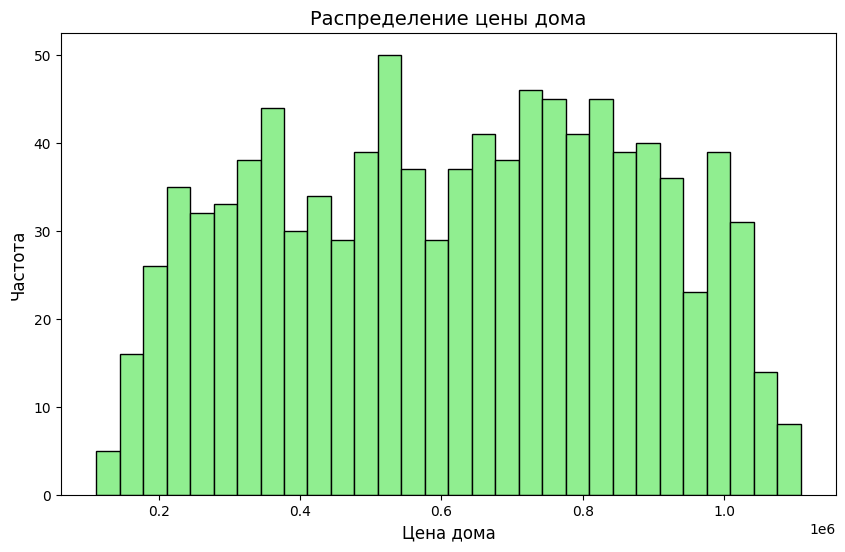

In [114]:
import matplotlib.pyplot as plt

# Построение гистограммы распределения цены дома
plt.figure(figsize=(10, 6))
plt.hist(prices["House_Price"], bins=30, color="lightgreen", edgecolor="black")

plt.xlabel("Цена дома", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.title("Распределение цены дома", fontsize=14)

plt.show()

### **Сохраним DataFrame в формате JSON.**

In [3]:
df.write.json("house_prices.json")
#df.write.json("house_prices.json") # ошибка

NameError: name 'df' is not defined

### **Кэшируем данные**

In [4]:
filtered_df = (
    df
    .filter(df["Num_Bedrooms"] > 3)
    .select("Year_Built", "Garage_Size")
    .limit(3)
)

# Операция 1: Показываем данные
print("Show Result:")
filtered_df.show()

# Операция 2: Вычисление среднего налога
print("Collect Result:")
print(filtered_df.select("Garage_Size").limit(3).collect())

NameError: name 'df' is not defined

In [118]:
filtered_df = (
    df
    .filter(df["Num_Bedrooms"] > 3)
    .select("Year_Built", "Garage_Size")
    .limit(3)
)
filtered_df.cache()

# Операция 1: Показываем данные
print("Show Result:")
filtered_df.show()

# Операция 2: Вычисление среднего налога
print("Collect Result:")
print(filtered_df.select("Garage_Size").limit(3).collect())

Show Result:
+----------+-----------+
|Year_Built|Garage_Size|
+----------+-----------+
|      1990|          2|
|      1981|          2|
|      1973|          2|
+----------+-----------+

Collect Result:
[Row(Garage_Size=2), Row(Garage_Size=2), Row(Garage_Size=2)]


### **`repartition` и `coalesce`**

In [119]:
# Увеличение числа партиций с 2 до 4
df_repartitioned = df1.repartition(4)

# Вывод количества партиций
print(f"Количество партиций до repartition: {df1.rdd.getNumPartitions()}")
print(f"Количество партиций после repartition: {df_repartitioned.rdd.getNumPartitions()}")

Количество партиций до repartition: 2
Количество партиций после repartition: 4


In [120]:
# Уменьшение числа партиций с 4 до 2
df_coalesced = df_repartitioned.coalesce(2)

# Вывод количества партиций
print(f"Количество партиций после coalesce: {df_repartitioned.rdd.getNumPartitions()}")
print(f"Количество партиций после coalesce: {df_coalesced.rdd.getNumPartitions()}")

Количество партиций после coalesce: 4
Количество партиций после coalesce: 2


In [121]:
# Исходный DataFrame с 4 партициями
df_original = df1.repartition(4)
print(f"Исходное количество партиций: {df_original.rdd.getNumPartitions()}")

# Использование repartition для уменьшения до 2 партиций
df_repartitioned_down = df_original.repartition(2)
print(f"Количество партиций после repartition: {df_repartitioned_down.rdd.getNumPartitions()}")

# Использование coalesce для уменьшения до 2 партиций
df_coalesced_down = df_original.coalesce(2)
print(f"Количество партиций после coalesce: {df_coalesced_down.rdd.getNumPartitions()}")

Исходное количество партиций: 4
Количество партиций после repartition: 2
Количество партиций после coalesce: 2


### **View -  обращаться к данным из DataFrame с помощью SQL-запросов.**

In [122]:
# Пример DataFrame
data = [("Alice", 34), ("Bob", 45), ("Cathy", 29)]
columns = ["Name", "Age"]

# Создать DataFrame
pyspark_df = spark.createDataFrame(data, columns)

# Регистрация временной вьюхи
pyspark_df.createOrReplaceTempView("people_view")

# Использование SQL-запроса к вьюхе
Q = """

    SELECT Name, Age
    FROM people_view
    WHERE Age > 30

    """

result = spark.sql(Q)
result.show()

+-----+---+
| Name|Age|
+-----+---+
|Alice| 34|
|  Bob| 45|
+-----+---+



### **Explain**

In [123]:
filtered_df = df.filter(df["Num_Bedrooms"] > 3).select("Year_Built", "Garage_Size")

# Вызов explain
filtered_df.explain()

== Physical Plan ==
*(1) Project [cast(Year_Built#2706 as string) AS Year_Built#4404, CASE WHEN (Garage_Size#2708 = 0) THEN 1 ELSE Garage_Size#2708 END AS Garage_Size#4745]
+- *(1) Filter (isnotnull(Num_Bedrooms#2704) AND (Num_Bedrooms#2704 > 3))
   +- FileScan csv [Num_Bedrooms#2704,Year_Built#2706,Garage_Size#2708] Batched: false, DataFilters: [isnotnull(Num_Bedrooms#2704), (Num_Bedrooms#2704 > 3)], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/content/house_price_regression_dataset.csv], PartitionFilters: [], PushedFilters: [IsNotNull(Num_Bedrooms), GreaterThan(Num_Bedrooms,3)], ReadSchema: struct<Num_Bedrooms:int,Year_Built:int,Garage_Size:int>




### **Конец сессии**

In [124]:
spark.stop()